# Seattle Weather, did it rain in Seattle between 1948 and 2017

Download the dataset from:

https://www.kaggle.com/datasets/rtatman/did-it-rain-in-seattle-19482017

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno         # To visualize missing values NAN

# Load the Dataset

In [173]:
# Import the dataset to the Jupyter Notebook
df = pd.read_csv('./data/seattleWeather_1948-2017.csv')

df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


# Exploratory Data Analysis

https://www.kaggle.com/code/faye0924/seattle-weather

## Basic Statistic Checks

In [174]:
# Pandas info method prints information about a DataFrame including the index dtype and columns, non-null 
# values and memory usage.Dataset (Pandas 2022)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [175]:
# Generate descriptive statistics. (Pandas 2022)

# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a 
# dataset’s distribution, excluding NaN values. (Pandas 2022)

# Analyzes both numeric and object series, as well as DataFrame column sets of mixed data types. The 
# output will vary depending on what is provided. Refer to the notes below for more details. (Pandas 2022)
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


## Missing Data (NaN)

In [176]:
# Detect missing values.
# Return a boolean same-sized object indicating if the values are NA. NA values, such as 
# None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values. 
# Characters such as empty strings '' or numpy.inf are not considered NA values (unless you set 
# pandas.options.mode.use_inf_as_na = True). (Pandas 2022)
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [177]:
# Select rows with missing values.
display(df[df['RAIN'].isnull()])

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [178]:
display(df[df['PRCP'].isnull()])

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [179]:
# using dropna() function   
df.dropna()

# Make new data frame with dropped NA values  
df1 = df.dropna(axis = 0, how ='any')

df1

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [180]:
# Check for missing data (NaN)
df1.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

<Axes: >

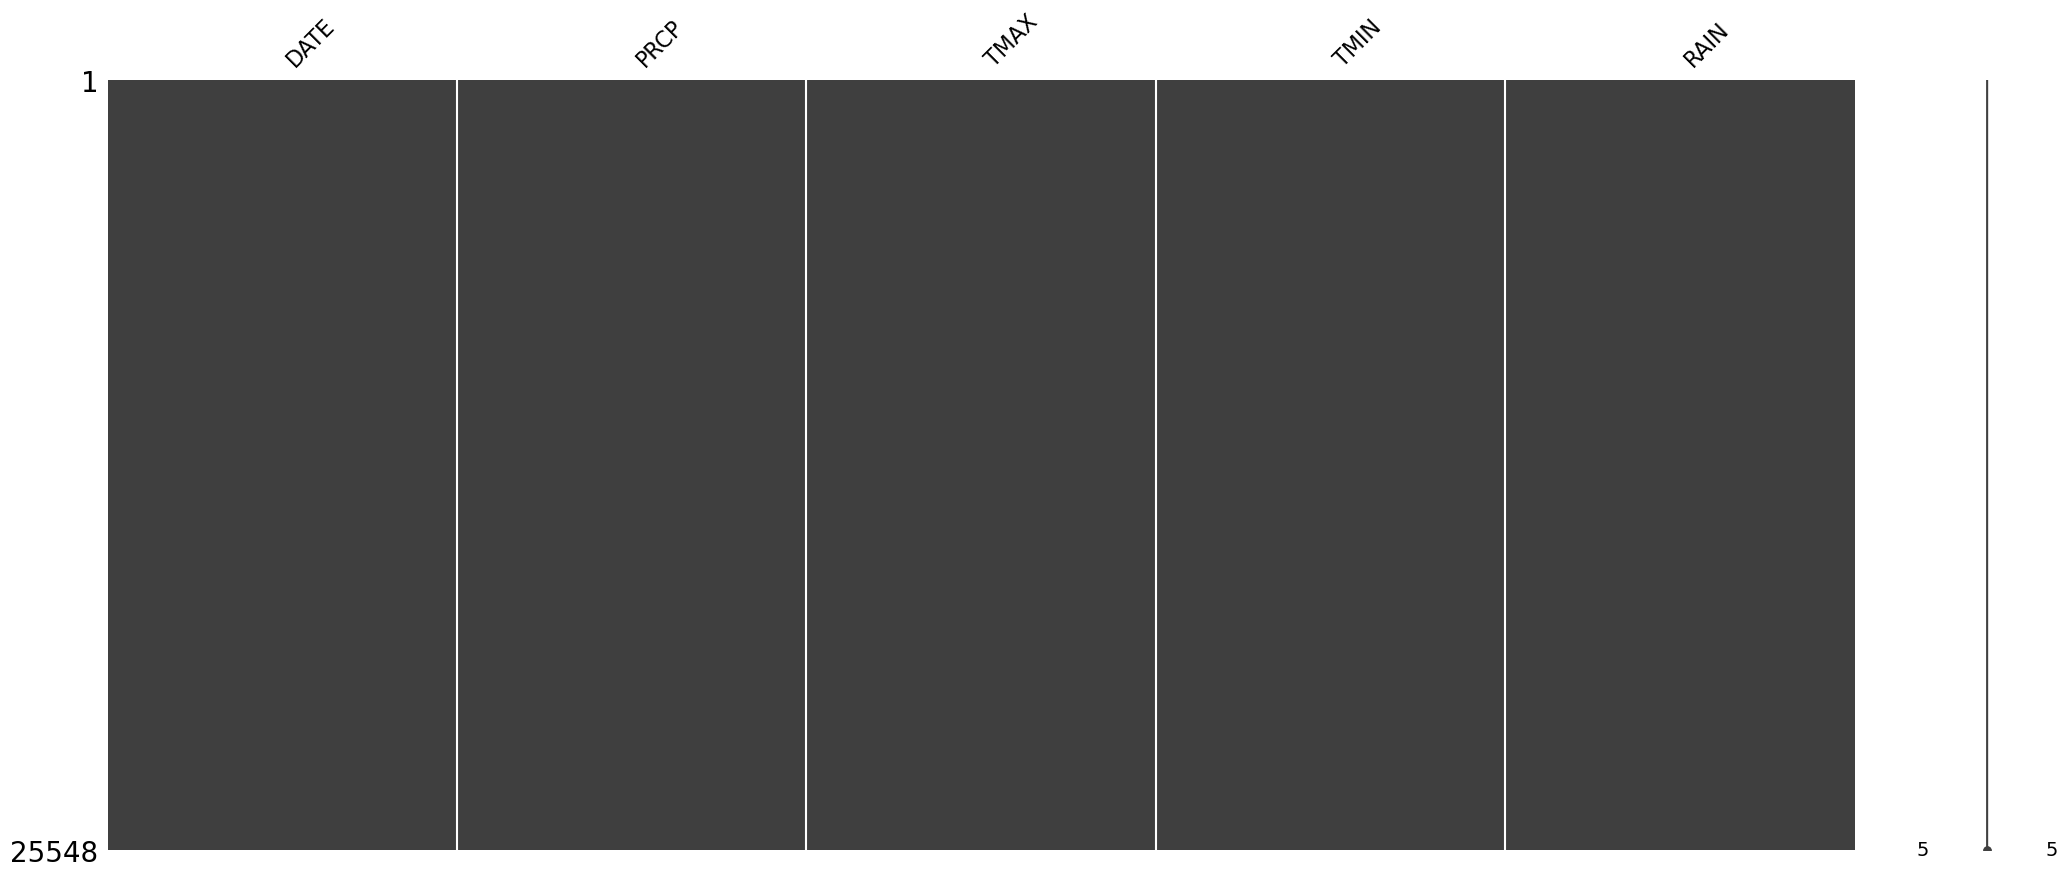

In [181]:
# Plots the locations of the missing values left in the dataset as a final check to determine there are no
# NAN values left in the Dataset df_mode
msno.matrix(df1)

## Correlation Check

/tmp/ipykernel_12175/1634750295.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


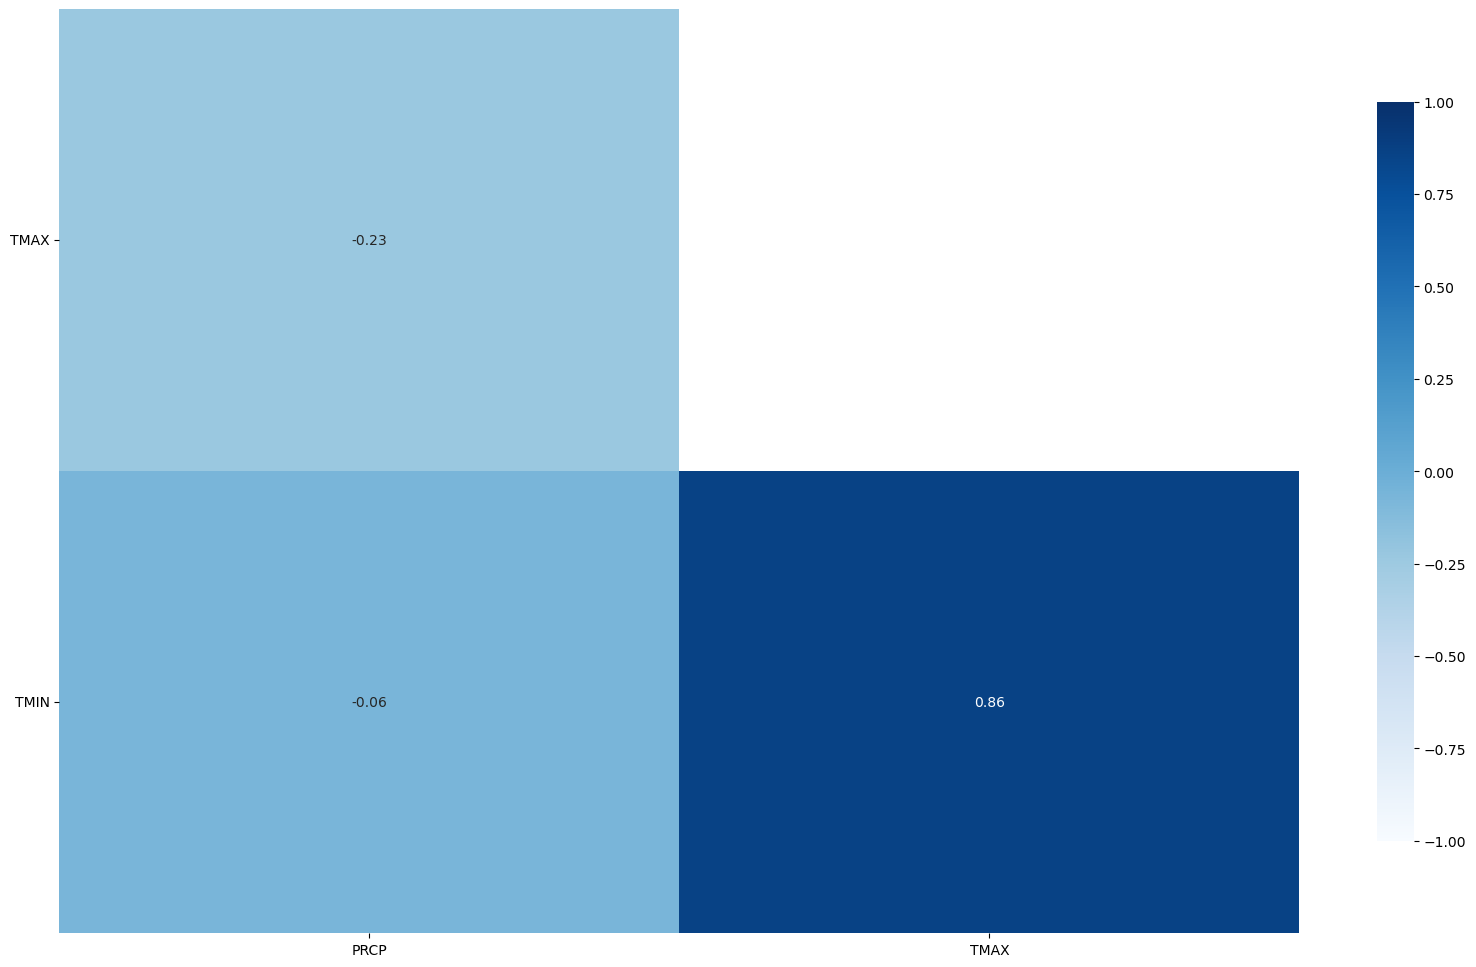

In [183]:
# get correlations
df_corr = df.corr()

# stores the values for plotting
fig, ax = plt.subplots(figsize=(20, 12))

# mask
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.show()

In [184]:
# Correlation Pandas DataFrame
df_corr

,PRCP,TMAX,TMIN
PRCP,1.000000,-0.226736,-0.064365
TMAX,-0.226736,1.000000,0.860684
TMIN,-0.064365,0.860684,1.000000


In [185]:
# Prints out df1 to the screen
df1

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


# Outliers Check

## Box Plot

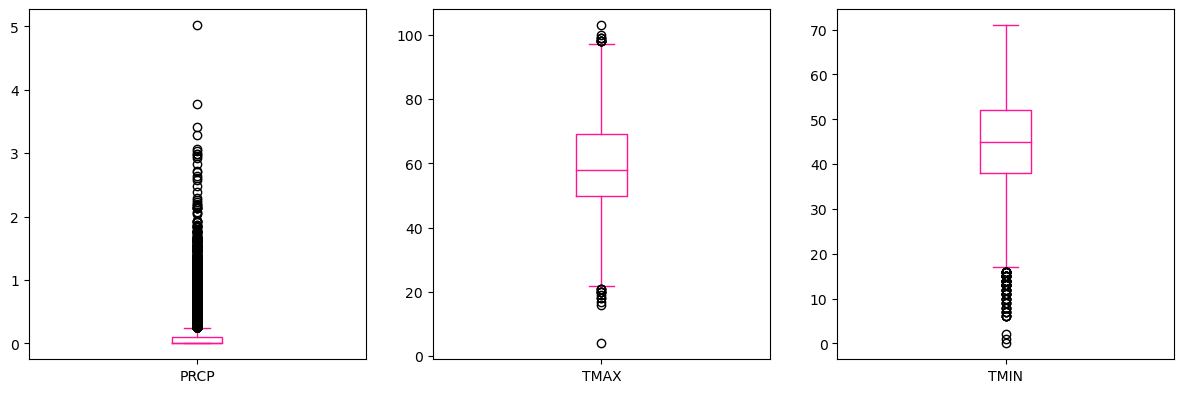

In [186]:
# Plots the outliers in the dataset
df1.plot(kind='box', subplots=True, layout=(2,4),
        sharex=False, sharey=False, figsize=(20, 10),
        color='deeppink');

## Outliers Count Python Method

In [187]:
# define continuous variable & plot
continous_features = ['PRCP', 'TMAX', 'TMIN']
def outliers(df_out, drop = False):
    """Prints out the number of outliers per feature to the screen."""
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))
df2 = df1
outliers(df2[continous_features])

For the feature PRCP, No of Outliers is 3558
For the feature TMAX, No of Outliers is 24
For the feature TMIN, No of Outliers is 92


# Data Pre-Processing

In [188]:
# Prints out df2 to the screen
df2

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


# Encode Categorical Data to Numeric Data

In [189]:
# Finds the columns with categorical data and store them in a Python list. The cat_cols list is to allow
# the feature columns to be encoded by the Label Encoder from SkLearn
cat_cols = df2.select_dtypes(include=['object']).columns.tolist()
cat_cols

['DATE', 'RAIN']

In [190]:
# Label encoder function to encode the labels of the DataFrame in preparation for classification
def encode_categorical(df, cat_cols):
    """Encode categorical columns with a LabelEncoder from ScikitLearn."""
    from sklearn.preprocessing import LabelEncoder
    
    new_df = df.copy(deep=True)
    for col in cat_cols:
        if col in df.columns:
            le = LabelEncoder()
            le.fit(list(df[col].astype(str).values))
            new_df[col] = le.transform(list(df[col].astype(str).values))
    
    return new_df

In [191]:
# Creates the df_const and df_mode DataFrames in preparation for SMOTE balancing
df3 = encode_categorical(df2, cat_cols)

## Ballance the Dataset Target Classes

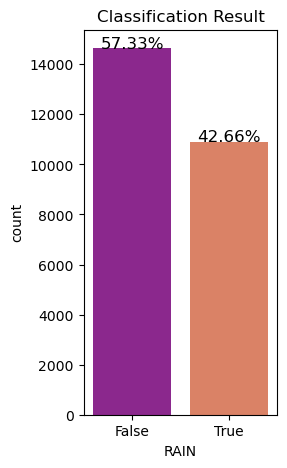

In [192]:
# Checking for imbalance dataset (with half of the dataset)
plt.figure(figsize=(2.5,5)) 
plt.title("Classification Result") 
p1 = sns.countplot(x=df['RAIN'], palette = 'plasma') 
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2.,
            height,
            f'{height/df.shape[0] * 100:.2f}%',
            ha='center', fontsize=12)

In [193]:
# define a balancing function using the SMOTE library from SkLearn
def smote_balance(df, random_state):
    """Carry out SMOTE balancing over the data with imblearn."""
    from imblearn.over_sampling import SMOTE

    X1 = df.drop('RAIN', axis=1)
    y1 = df.RAIN

    sm = SMOTE(random_state=42)

    X_sm, y_sm = sm.fit_resample(X1, y1)

    print(f'''Shape of X before SMOTE: {X1.shape}
          Shape of X after SMOTE: {X_sm.shape}''')
    print(f'''Shape of y before SMOTE: {y1.shape}
          Shape of y after SMOTE: {y_sm.shape}''')
    return pd.concat([X_sm, y_sm], axis=1)

In [194]:
# Calls the imbleran SMOTE Python method and balances the dataset
df4 = smote_balance(df3, random_state=42)

# Prints out df4 to the screen
df4

Shape of X before SMOTE: (25548, 4)
          Shape of X after SMOTE: (29296, 4)
Shape of y before SMOTE: (25548,)
          Shape of y after SMOTE: (29296,)


,DATE,PRCP,TMAX,TMIN,RAIN
0,0,0.470000,51,42,1
1,1,0.590000,45,36,1
2,2,0.420000,45,35,1
3,3,0.310000,45,34,1
4,4,0.170000,45,32,1
...,...,...,...,...,...
29291,5536,0.060150,51,40,1
29292,13254,0.100946,57,41,1
29293,8239,0.228508,67,57,1
29294,8047,0.062052,39,32,1


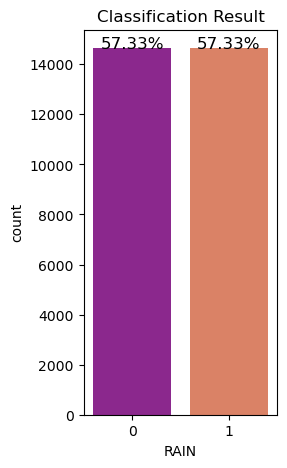

In [196]:
# Checking for imbalance dataset (with half of the dataset)
plt.figure(figsize=(2.5,5)) 
plt.title("Classification Result") 
p1 = sns.countplot(x=df4['RAIN'], palette = 'plasma') 
for p in p1.patches:
    height = p.get_height()
    p1.text(p.get_x()+p.get_width()/2.,
            height,
            f'{height/df.shape[0] * 100:.2f}%',
            ha='center', fontsize=12)

## Separate the Features from the Target Classes

In [198]:
# Prints out df4 to the screen
df4

,DATE,PRCP,TMAX,TMIN,RAIN
0,0,0.470000,51,42,1
1,1,0.590000,45,36,1
2,2,0.420000,45,35,1
3,3,0.310000,45,34,1
4,4,0.170000,45,32,1
...,...,...,...,...,...
29291,5536,0.060150,51,40,1
29292,13254,0.100946,57,41,1
29293,8239,0.228508,67,57,1
29294,8047,0.062052,39,32,1


In [199]:
# Pops the y targets from df4
y = df4.pop('RAIN')

y

0        1
1        1
2        1
3        1
4        1
        ..
29291    1
29292    1
29293    1
29294    1
29295    1
Name: RAIN, Length: 29296, dtype: int64

## Double Check the Features for Missing Data (NaN)

In [202]:
# Ouptuts the features to the screen
X = df4

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29296 entries, 0 to 29295
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    29296 non-null  int64  
 1   PRCP    29296 non-null  float64
 2   TMAX    29296 non-null  int64  
 3   TMIN    29296 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 915.6 KB


## Normalise the Data

In [205]:
# Finds the columns that have categorical data and stores it in a Python list. The cat_cols list is to allow
# the feature columns to be encoded by the Label Encoder from SkLearn.
list_numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Pritns out the list_numerical list to the screen
list_numerical

['DATE', 'PRCP', 'TMAX', 'TMIN']

In [209]:
# Scaling the dataset 
def get_scale(X, list_numerical):
    
    """Normalises the dataset with ScikitLearn."""
    from sklearn.preprocessing import StandardScaler
    
    # Normalises the data for the neural network between -1 and 1 discrete values
    # with 0 mean value
    scaler = StandardScaler().fit(X[list_numerical]) 

    # Fits the normalisation for the data
    X[list_numerical] = scaler.transform(X[list_numerical])

    return X

In [210]:
# Sends the dataset to the get_scale Python method to normailise
X = get_scale(X, list_numerical)

X

,DATE,PRCP,TMAX,TMIN
0,-1.725068,1.400459,-0.618685,-0.260914
1,-1.724933,1.886575,-1.099615,-0.950025
2,-1.724797,1.197911,-1.099615,-1.064877
3,-1.724662,0.752304,-1.099615,-1.179729
4,-1.724527,0.185169,-1.099615,-1.409432
...,...,...,...,...
29291,-0.975850,-0.259831,-0.618685,-0.490618
29292,0.068671,-0.094566,-0.137754,-0.375766
29293,-0.610038,0.422183,0.663797,1.461864
29294,-0.636022,-0.252125,-1.580546,-1.409432


## Split the Training and Test Data (80/20 Split)

In [212]:
# Splitting the dataset 
def get_test_train_splits(X, y, test_size, random_state):
    """Splits the dataset with ScikitLearn (80% training, 20% testing)."""
    from sklearn.model_selection import train_test_split
    
    # Returns the dataset after applying the train test split from ScikitLearn
    return train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)

In [228]:
# Variables to pass to the get_test_train_splits Python method
test_size = 0.2
random=42

# Gets the train test split through the function call
X_train, X_test, y_train, y_test = get_test_train_splits(X, y, test_size, random)

# Creates a variable for the X_train Pandas DataFrame that has been converted to a NumPy 2D array for
# the training input data examples
X_train

,DATE,PRCP,TMAX,TMIN
10268,-0.335442,1.603007,-0.859150,-0.490618
13386,0.086535,-0.503495,1.385192,1.117308
8557,-0.567001,-0.057889,0.503486,0.428197
4661,-1.094269,-0.503495,0.663797,0.198493
8073,-0.632503,-0.503495,0.503486,0.313345
...,...,...,...,...
27670,1.258948,-0.213260,-0.217909,0.083642
20784,1.087748,-0.503495,-1.099615,-1.294580
28187,-0.985865,0.200841,-0.939305,-0.375766
19854,0.961886,-0.057889,-0.057599,0.313345


In [229]:
# Displays X_test to the screen
X_test

,DATE,PRCP,TMAX,TMIN
12399,-0.047041,-0.503495,-1.340080,-1.409432
8467,-0.579181,-0.503495,-1.179770,-1.064877
22451,1.313353,-0.503495,1.064572,0.887604
2294,-1.414608,-0.503495,-0.298064,-0.490618
2329,-1.409871,-0.503495,1.305037,0.198493
...,...,...,...,...
14445,0.229856,-0.503495,1.705813,1.347012
17324,0.619487,-0.503495,1.465347,0.772753
23878,1.506477,-0.503495,0.663797,0.543049
20715,1.078410,-0.503495,0.343176,0.313345


In [230]:
# Displays y_train to the screen
y_train

10268    1
13386    0
8557     1
4661     0
8073     0
        ..
27670    1
20784    0
28187    1
19854    1
27552    1
Name: RAIN, Length: 23436, dtype: int64

In [231]:
# Displays y_test to the screen
y_test

12399    0
8467     0
22451    0
2294     0
2329     0
        ..
14445    0
17324    0
23878    0
20715    0
8845     0
Name: RAIN, Length: 5860, dtype: int64

# Output the Preprocessed Data to CSV Files

In [232]:
import os
import pathlib

# Creates a file directory to store the saved model if required
def create_file_path(file_path_check):

    """Creates a file path to cave any plots to if the file path does not exist.
        file_path_check: file path directory to check if it has been created previously or not.
    """

    # If the output directory does not exist, the OS modules makes the directory
    # Creates the file path variable
    file = pathlib.Path(file_path_check)

    # Conditional if statement to control the CSV data dump is required or not
    if file.exists():
        # Passes the if statement as the file directory for the saved model exists
        pass
    else:
        # Outputs the folder contents to CSV files for each column
        os.makedirs(file_path_check)

In [233]:
# Output the data to csv_files
file_path_check = 'output_csv_data'

# Calls the create_file_path Pyhton method
create_file_path(file_path_check)

In [236]:
# Output the preprocessed data to CSV files in the output_csv_data file path directory
X_train.to_csv('./output_csv_data/X_train.csv', index=False)
X_test.to_csv('./output_csv_data/X_test.csv', index=False)
y_train.to_csv('./output_csv_data/y_train.csv', index=False)
y_test.to_csv('./output_csv_data/y_test.csv', index=False)

# Prints out all the Python files to the screen

In [235]:
# Prints out all the Python files to the screen
%whos

Variable                Type         Data/Info
----------------------------------------------
X                       DataFrame               DATE      PRCP<...>n[29296 rows x 4 columns]
X_test                  DataFrame               DATE      PRCP<...>\n[5860 rows x 4 columns]
X_train                 DataFrame               DATE      PRCP<...>n[23436 rows x 4 columns]
ax                      Axes         Axes(0.125,0.11;0.62x0.77)
cat_cols                list         n=4
continous_features      list         n=3
corr                    DataFrame              PRCP      TMAX\<...>nTMIN -0.064365  0.860684
create_file_path        function     <function create_file_path at 0x7f965d10a3e0>
df                      DataFrame                 DATE  PRCP  <...>n[25551 rows x 5 columns]
df1                     DataFrame                 DATE  PRCP  <...>n[25548 rows x 5 columns]
df2                     DataFrame                 DATE  PRCP  <...>n[25548 rows x 5 columns]
df3                     Da